### Capstone Project: Part 4

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import naive_bayes
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

from sklearn.preprocessing import label_binarize

import warnings
import numpy as np
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.simplefilter('ignore')

In [2]:
def plot_f1_lines(figsize=(8, 6), fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)

    # add lines of constant F1 scores

    for const in np.linspace(0.2, 0.9, 8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                    xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

In [3]:
df = pd.read_csv('/Users/darshanasridhar/Documents/Ga Capstone Datasets /Recidivism/recidivism_clean.csv')
df

,Year Released,Tracking End,Average Release Age,Recidivism Type,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,...,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,2,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26012,2015,2018,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26013,2015,2018,39.5,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
26014,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
26015,2015,2018,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df_copy = df.copy()
X = df_copy.drop('Recidivism Type', axis=1)

In [5]:
X

,Year Released,Tracking End,Average Release Age,District_2JD,District_3JD,District_4JD,District_5JD,District_6JD,District_7JD,District_8JD,...,Offense Subtype_Robbery,Offense Subtype_Sex,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons
0,2010,2013,29.5,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,2010,2013,29.5,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2010,2013,39.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2010,2013,29.5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010,2013,39.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26012,2015,2018,25.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26013,2015,2018,39.5,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
26014,2015,2018,29.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26015,2015,2018,29.5,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
X.columns

Index(['Year Released', 'Tracking End', 'Average Release Age', 'District_2JD',
       'District_3JD', 'District_4JD', 'District_5JD', 'District_6JD',
       'District_7JD', 'District_8JD', 'District_ISC',
       'District_Interstate Compact', 'District_None Given',
       'Release Type_None Given', 'Release Type_Parole',
       'Release Type_Special Sentence', 'Ethnicity_Non-Hispanic',
       'Ethnicity_None Given', 'Race_Asian or Pacific Islander', 'Race_Black',
       'Race_None Given', 'Race_White', 'Sex_Male', 'Offense Classification_2',
       'Offense Classification_3', 'Offense Classification_4',
       'Offense Classification_5', 'Offense Classification_6',
       'Offense Classification_7', 'Offense Classification_8',
       'Offense Type_Other', 'Offense Type_Property',
       'Offense Type_Public Order', 'Offense Type_Violent',
       'Offense Subtype_Animals', 'Offense Subtype_Arson',
       'Offense Subtype_Assault', 'Offense Subtype_Burglary',
       'Offense Subtype_Drug

In [7]:
y = df.pop('Recidivism Type')

In [8]:
y

0        2
1        1
2        1
3        0
4        1
        ..
26012    0
26013    0
26014    0
26015    0
26016    1
Name: Recidivism Type, Length: 26017, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify = y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(20813, 59) (20813,)
(5204, 59) (5204,)


In [10]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [ ]:
#Baseline
y.value_counts(normalize=True)
print('Baseline - Predict Class 0:', y.value_counts(normalize=True).max())

In [ ]:
print('Baseline:', y.value_counts(normalize=True))

**Individual Features*

In [36]:
#Race
X_race= df[['Race_Black', 'Race_White', 'Race_Asian or Pacific Islander','Race_None Given']]

X_train, X_test, y_train, y_test = train_test_split(X_race, y, test_size=0.2, random_state=10, stratify = y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)
           
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

           
model_1 = LogisticRegression(multi_class='ovr', max_iter=1000, penalty='none') 

model_1.fit(X_train, y_train)

train_predictions_1 = model_1.predict(X_train)
test_predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

#print('Accuracy score', model_1.score(scaler.transform(X), y))
print('Precision score', precision_score(y_test, test_predictions_1, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_1, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_1, average='micro'))

print('Training score', model_1.score(X_train, y_train))
print('Testing score', model_1.score(X_test, y_test))

cv_scores = cross_val_score(model_1, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))
print(np.unique(test_predictions_1))

(20813, 4) (20813,)
(5204, 4) (5204,)
Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6663143227790324
Testing score 0.6664104534973098
CV scores [0.66634638 0.66634638 0.66634638 0.66626622 0.66626622]
Mean CV Score 0.6663143181569219
[0]


In [38]:
#Sex
X_sex= df[['Sex_Male']]

X_train, X_test, y_train, y_test = train_test_split(X_sex, y, test_size=0.2, random_state=10, stratify = y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)
           
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

           
model_1 = LogisticRegression(multi_class='ovr', max_iter=1000, penalty='none')

model_1.fit(X_train, y_train)

train_predictions_1 = model_1.predict(X_train)
test_predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

#print('Accuracy score', model_1.score(scaler.transform(X), y))
print('Precision score', precision_score(y_test, test_predictions_1, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_1, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_1, average='micro'))

print('Training score', model_1.score(X_train, y_train))
print('Testing score', model_1.score(X_test, y_test))

cv_scores = cross_val_score(model_1, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))
print(np.unique(test_predictions_1))

(20813, 1) (20813,)
(5204, 1) (5204,)
Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6663143227790324
Testing score 0.6664104534973098
CV scores [0.66634638 0.66634638 0.66634638 0.66626622 0.66626622]
Mean CV Score 0.6663143181569219
[0]


In [37]:
#District
X_dist= df[['District_2JD','District_3JD', 'District_4JD', 'District_5JD', 'District_6JD',
       'District_7JD', 'District_8JD', 'District_ISC',
       'District_Interstate Compact', 'District_None Given']]

X_train, X_test, y_train, y_test = train_test_split(X_dist, y, test_size=0.2, random_state=10, stratify = y)
print(X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)
           
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

           
model_1 = LogisticRegression(multi_class='ovr', max_iter=1000, penalty='none')

model_1.fit(X_train, y_train)

train_predictions_1 = model_1.predict(X_train)
test_predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

#print('Accuracy score', model_1.score(scaler.transform(X), y))
print('Precision score', precision_score(y_test, test_predictions_1, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_1, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_1, average='micro'))

print('Training score', model_1.score(X_train, y_train))
print('Testing score', model_1.score(X_test, y_test))

cv_scores = cross_val_score(model_1, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))
print(np.unique(test_predictions_1))

(20813, 10) (20813,)
(5204, 10) (5204,)
Precision score 0.6664104534973098
Recall score 0.6664104534973098
F1 score 0.6664104534973098
Training score 0.6663143227790324
Testing score 0.6664104534973098
CV scores [0.66634638 0.66634638 0.66634638 0.66626622 0.66626622]
Mean CV Score 0.6663143181569219
[0]


**Random Over Sampling**

In [24]:
#Model 1
model_1 = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000) 

#steps = [('over', RandomOverSampler(sampling_strategy='all')),
         #('model', LogisticRegression())]

#imb_pipeline_1 = ImbPipeline(steps=steps)
#imb_pipeline_1.fit(X_train, y_train)
#cross_val_score(imb_pipeline, X_train, y_train, cv=5).mean()

model_1.fit(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=88)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
yvals, counts = np.unique(y_test, return_counts=True)
yvals_ros, counts_ros = np.unique(y_resampled, return_counts=True)
print('Classes in test set:',dict(zip(yvals, counts)),'\n', 'Classes in rebalanced test set:',dict(zip(yvals_ros,counts_ros)))

train_predictions_1 = model_1.predict(X_train)
test_predictions_1 = model_1.predict(X_test)
probabilities_1 = model_1.predict_proba(X_test)

print('Precision score', precision_score(y_test, test_predictions_1, average='micro'))
print('Recall score', (recall_score(y_test, test_predictions_1, average='micro')))
print('F1 score', f1_score(y_test, test_predictions_1, average='micro'))

print('Training score', model_1.score(X_train, y_train))
print('Testing score', model_1.score(X_test, y_test))

cv_scores = cross_val_score(model_1, X_train, y_train, cv=5)
print('CV scores', cv_scores)
print('Mean CV Score', np.mean(cv_scores))
print(np.unique(test_predictions_1))


Classes in test set: {0: 3468, 1: 633, 2: 1103} 
 Classes in rebalanced test set: {0: 13868, 1: 13868, 2: 13868}
Precision score 0.6654496541122213
Recall score 0.6654496541122213
F1 score 0.6654496541122213
Training score 0.6684283861048383
Testing score 0.6654496541122213
CV scores [0.67643526 0.66202258 0.66946913 0.66338299 0.66770783]
Mean CV Score 0.6678035594917955
[0 1 2]


In [13]:
print(confusion_matrix(y_test, test_predictions_1, labels=[0, 1, 2]))

[[3391   14   63]
 [ 611   15    7]
 [1035   11   57]]


In [14]:
print(classification_report(y_train, train_predictions_1, digits=4))

              precision    recall  f1-score   support

           0     0.6740    0.9800    0.7987     13868
           1     0.4888    0.0344    0.0642      2532
           2     0.4979    0.0533    0.0962      4413

    accuracy                         0.6684     20813
   macro avg     0.5536    0.3559    0.3197     20813
weighted avg     0.6141    0.6684    0.5604     20813



In [15]:
print(classification_report(y_test, test_predictions_1, digits=4))

              precision    recall  f1-score   support

           0     0.6732    0.9778    0.7974      3468
           1     0.3750    0.0237    0.0446       633
           2     0.4488    0.0517    0.0927      1103

    accuracy                         0.6654      5204
   macro avg     0.4990    0.3511    0.3116      5204
weighted avg     0.5894    0.6654    0.5565      5204



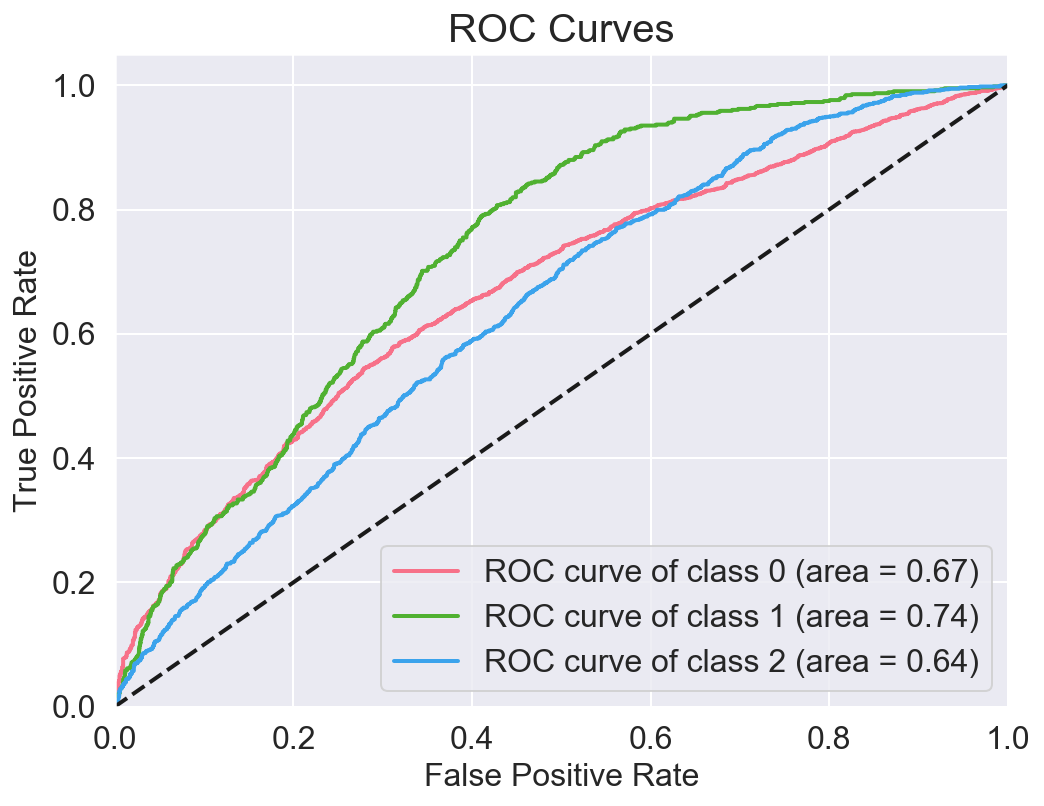

Area under ROC curve (ROC-AUC):
Class 0: 0.67
Class 1: 0.74
Class 2: 0.64


In [16]:
#ROC curve for Model 1
y_test_bin_1 = label_binarize(y_test, model_1.classes_)

skplt.metrics.plot_roc(y_test, model_1.predict_proba(X_test), plot_micro=False, plot_macro=False,
                       title_fontsize=20, text_fontsize=16, figsize=(8, 6), cmap=cmap)
plt.show()

print('Area under ROC curve (ROC-AUC):')
for i, class_ in enumerate(model_1.classes_):
    print('Class {}:'.format(class_), round(metrics.roc_auc_score(
        y_test_bin_1[:, i], model_1.predict_proba(X_test)[:, i]), 2))

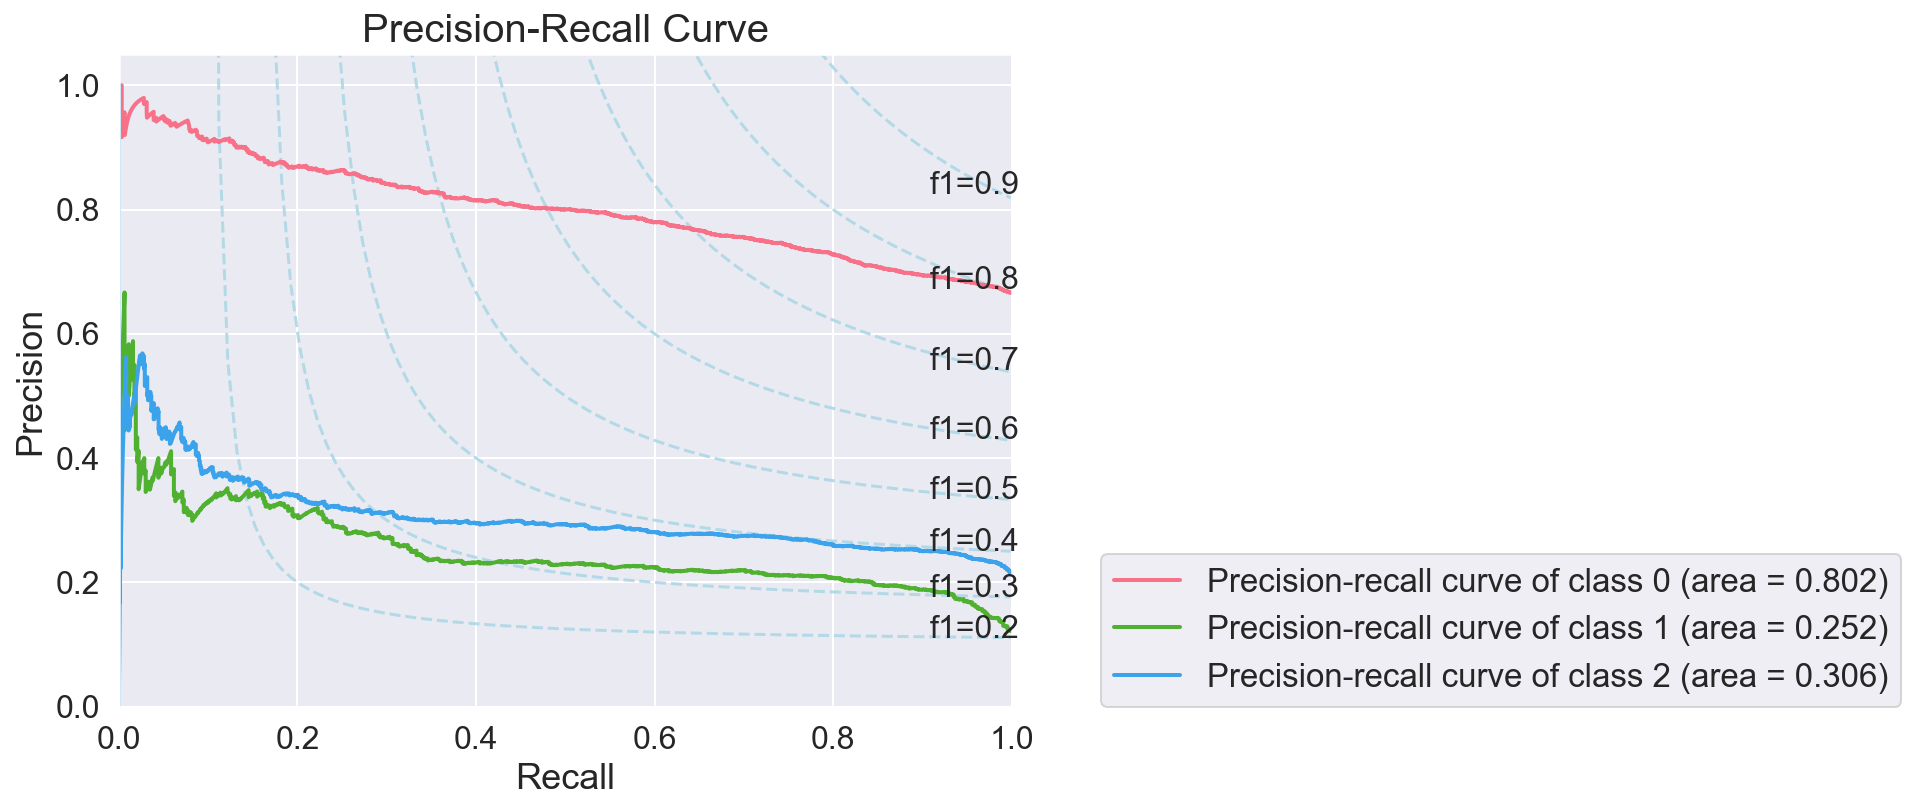

Area under precision-recall curve:
Class 0: 0.8021
Class 1: 0.2516
Class 2: 0.3059


In [17]:
#Precision-Recall curve for Model 1
fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, model_1.predict_proba(X_test),
                                    plot_micro=False,
                                    title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1, 0])
plt.show()

print('Area under precision-recall curve:')
for i, class_ in enumerate(model_1.classes_):
    print('Class {}:'.format(class_), round(metrics.average_precision_score(
        y_test_bin_1[:, i], model_1.predict_proba(X_test)[:, i]), 4))